# Data Processing

In [22]:
import warnings
warnings.filterwarnings("ignore")

import random #número aleatorio
import numpy as np #calculo matricial y operaciones aritméticas 
import matplotlib.pyplot as plt #para visualización de gráficos
import pandas as pd #gestionar set de datos de una manera estructurada
from sklearn.impute import SimpleImputer #puedes llamar solo la funcion concreta de esa libreria que quieres aplicar
import missingno as msno #para la visualización de datos faltantes "missing data"
from sklearn import linear_model

Vamos a fijar la semilla aleatoria, esa función sirve para repetir procesos y obtener los mismos resultados.

In [3]:
random.seed(0)

Crearemos una función, la variable es "data" que será el nombre de nuestro dataframe, la instrucción que le vamos a dar es con la libreira pandas (pd) queremos que lea (.read) el csv (_csv) que es el formato en el que tenemos el archivo, y en los paréntesis () pondremos dentro el 'nombre_del_archivo.tipo_de_archivo'

In [4]:
data = pd.read_csv('Breast_Cancer_Data.csv')

In [5]:
data

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


In [6]:
data.info() #ordenamos ver que información contiene nuestro data frame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [7]:
data.columns # ordenamos ver que encabezado tiene las columnas

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [8]:
data.T

,0,1,2,3,4,5,6,7,8,9,...,559,560,561,562,563,564,565,566,567,568
id,842302,842517,84300903,84348301,84358402,843786,844359,84458202,844981,84501001,...,925291,925292,925311,925622,926125,926424,926682,926954,927241,92751
diagnosis,M,M,M,M,M,M,M,M,M,M,...,B,B,B,M,M,M,M,M,M,B
radius_mean,17.99,20.57,19.69,11.42,20.29,12.45,18.25,13.71,13.0,12.46,...,11.51,14.05,11.2,15.22,20.92,21.56,20.13,16.6,20.6,7.76
texture_mean,10.38,17.77,21.25,20.38,14.34,15.7,19.98,20.83,21.82,24.04,...,23.93,27.15,29.37,30.62,25.09,22.39,28.25,28.08,29.33,24.54
perimeter_mean,122.8,132.9,130.0,77.58,135.1,82.57,119.6,90.2,87.5,83.97,...,74.52,91.38,70.67,103.4,143.0,142.0,131.2,108.3,140.1,47.92
area_mean,1001.0,1326.0,1203.0,386.1,1297.0,477.1,1040.0,577.9,519.8,475.9,...,403.5,600.4,386.0,716.9,1347.0,1479.0,1261.0,858.1,1265.0,181.0
smoothness_mean,0.1184,0.08474,0.1096,0.1425,0.1003,0.1278,0.09463,0.1189,0.1273,0.1186,...,0.09261,0.09929,0.07449,0.1048,0.1099,0.111,0.0978,0.08455,0.1178,0.05263
compactness_mean,0.2776,0.07864,0.1599,0.2839,0.1328,0.17,0.109,0.1645,0.1932,0.2396,...,0.1021,0.1126,0.03558,0.2087,0.2236,0.1159,0.1034,0.1023,0.277,0.04362
concavity_mean,0.3001,0.0869,0.1974,0.2414,0.198,0.1578,0.1127,0.09366,0.1859,0.2273,...,0.1112,0.04462,0.0,0.255,0.3174,0.2439,0.144,0.09251,0.3514,0.0
concave points_mean,0.1471,0.07017,0.1279,0.1052,0.1043,0.08089,0.074,0.05985,0.09353,0.08543,...,0.04105,0.04304,0.0,0.09429,0.1474,0.1389,0.09791,0.05302,0.152,0.0


In [9]:
data.shape

(569, 33)

In [10]:
#pip install missingno

In [11]:
data_nans = data.copy()
for column_i in data.columns:
    num_missings = random.randint(0,int(len(data)/3))
    for j in range(num_missings):
        idx = random.randint(0,len(data))
        data_nans[column_i][idx] = np.nan

<Axes: >

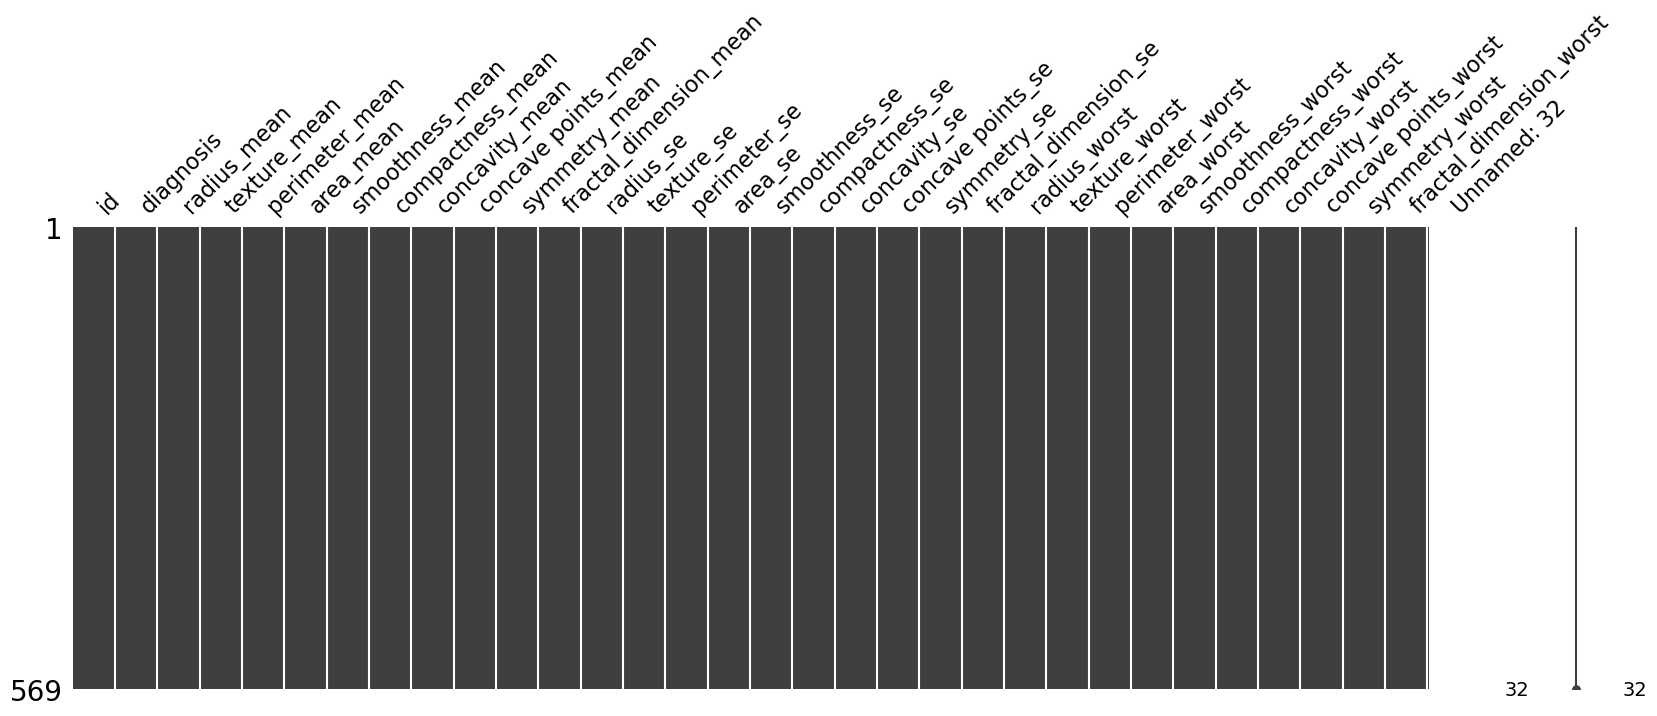

In [12]:
mno.matrix(data, figsize = (20, 6))

In [13]:
#hace un enumerate "un conteo" de la cantidad de NaN

for i, column in enumerate(data_nans.columns):
    nan_count = data_nans[column].isna().sum()
    if nan_count > 0:
        print(i, column, nan_count)

0 id 92
1 diagnosis 137
2 radius_mean 138
3 texture_mean 99
4 perimeter_mean 84
5 area_mean 67
6 smoothness_mean 147
7 compactness_mean 104
8 concavity_mean 77
9 concave points_mean 85
10 symmetry_mean 156
11 fractal_dimension_mean 86
12 radius_se 91
13 texture_se 142
14 perimeter_se 146
15 area_se 35
16 smoothness_se 129
17 compactness_se 57
18 concavity_se 121
19 concave points_se 78
20 symmetry_se 29
21 fractal_dimension_se 34
22 radius_worst 123
23 texture_worst 143
24 perimeter_worst 146
25 area_worst 147
26 smoothness_worst 16
27 compactness_worst 106
28 concavity_worst 93
29 concave points_worst 5
30 symmetry_worst 7
31 fractal_dimension_worst 99
32 Unnamed: 32 569


<Axes: >

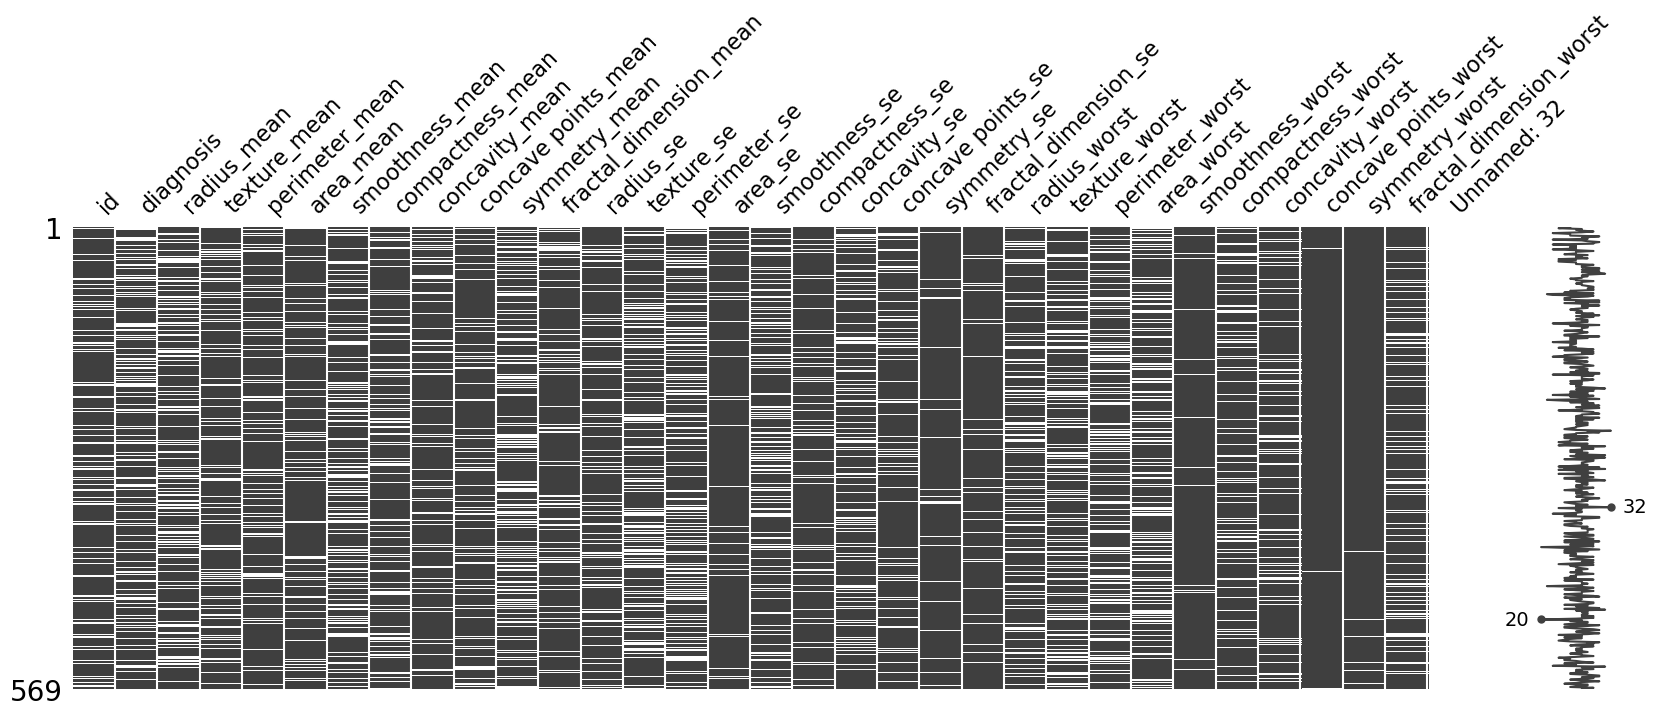

In [14]:
mno.matrix(data_nans, figsize = (20, 6))

In [15]:
# importing an array of features
x = data.iloc[:,2:].values 
# importing an array of dependent variable
y = data.iloc[:,0].values

In [16]:
data_nans.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302.0,NaN,17.99,NaN,122.8,NaN,0.11840,0.27760,0.3001,0.1471,...,17.33,184.60,NaN,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,NaN,NaN,20.57,17.77,132.9,NaN,0.08474,0.07864,0.0869,NaN,...,23.41,158.80,NaN,0.1238,NaN,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903.0,NaN,19.69,21.25,130.0,1203.0,0.10960,0.15990,0.1974,0.1279,...,25.53,152.50,NaN,0.1444,0.4245,NaN,0.2430,0.3613,0.08758,NaN
3,84348301.0,NaN,11.42,20.38,NaN,386.1,NaN,0.28390,NaN,0.1052,...,NaN,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402.0,M,20.29,14.34,135.1,1297.0,0.10030,0.13280,0.1980,0.1043,...,NaN,152.20,NaN,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Nota: para modificar listas se hace desde el indice

Conteo de datos faltantes, cuando tienes una lista, si le añades la instrucción 'enumerate', te muestra el indice y la posición que ocupa cada elemente en la lista con su valor. 

In [18]:
for i, column in enumerate(data_nans.columns):
    nan_count = data_nans[column].isna().sum()
    if nan_count > 0:
        print(i, column, nan_count)

0 id 92
1 diagnosis 137
2 radius_mean 138
3 texture_mean 99
4 perimeter_mean 84
5 area_mean 67
6 smoothness_mean 147
7 compactness_mean 104
8 concavity_mean 77
9 concave points_mean 85
10 symmetry_mean 156
11 fractal_dimension_mean 86
12 radius_se 91
13 texture_se 142
14 perimeter_se 146
15 area_se 35
16 smoothness_se 129
17 compactness_se 57
18 concavity_se 121
19 concave points_se 78
20 symmetry_se 29
21 fractal_dimension_se 34
22 radius_worst 123
23 texture_worst 143
24 perimeter_worst 146
25 area_worst 147
26 smoothness_worst 16
27 compactness_worst 106
28 concavity_worst 93
29 concave points_worst 5
30 symmetry_worst 7
31 fractal_dimension_worst 99


# Tratamiento de los datos que faltan

### Eliminación de la observación con los valores que faltan. 

Grandes conjuntos de datos con pocos valores perdidos.

Sustituimos nuestros valores faltantes. Si la cantidad de valores faltantes es mayor al 30% de los datos, eliminamos esa columna.

P. ej.: eliminar una fila de un conjunto de datos con cientos de observaciones no puede afectar a la calidad de la información del conjunto de datos.

También podría utilizarse para eliminar una variable con demasiados valores perdidos.

No es adecuado para un conjunto de datos con muchos valores perdidos. Eliminar muchas filas de un conjunto de datos conlleva la pérdida de información.

In [20]:
# Remove column if amount of nan data >= 30%
for i, column in enumerate(data_nans.columns):
    nan_count = data_nans[column].isna().sum()
    if nan_count >= len(data_nans)*0.3:
        print("Column removed: ", column)
        del data_nans[column]

<Axes: >

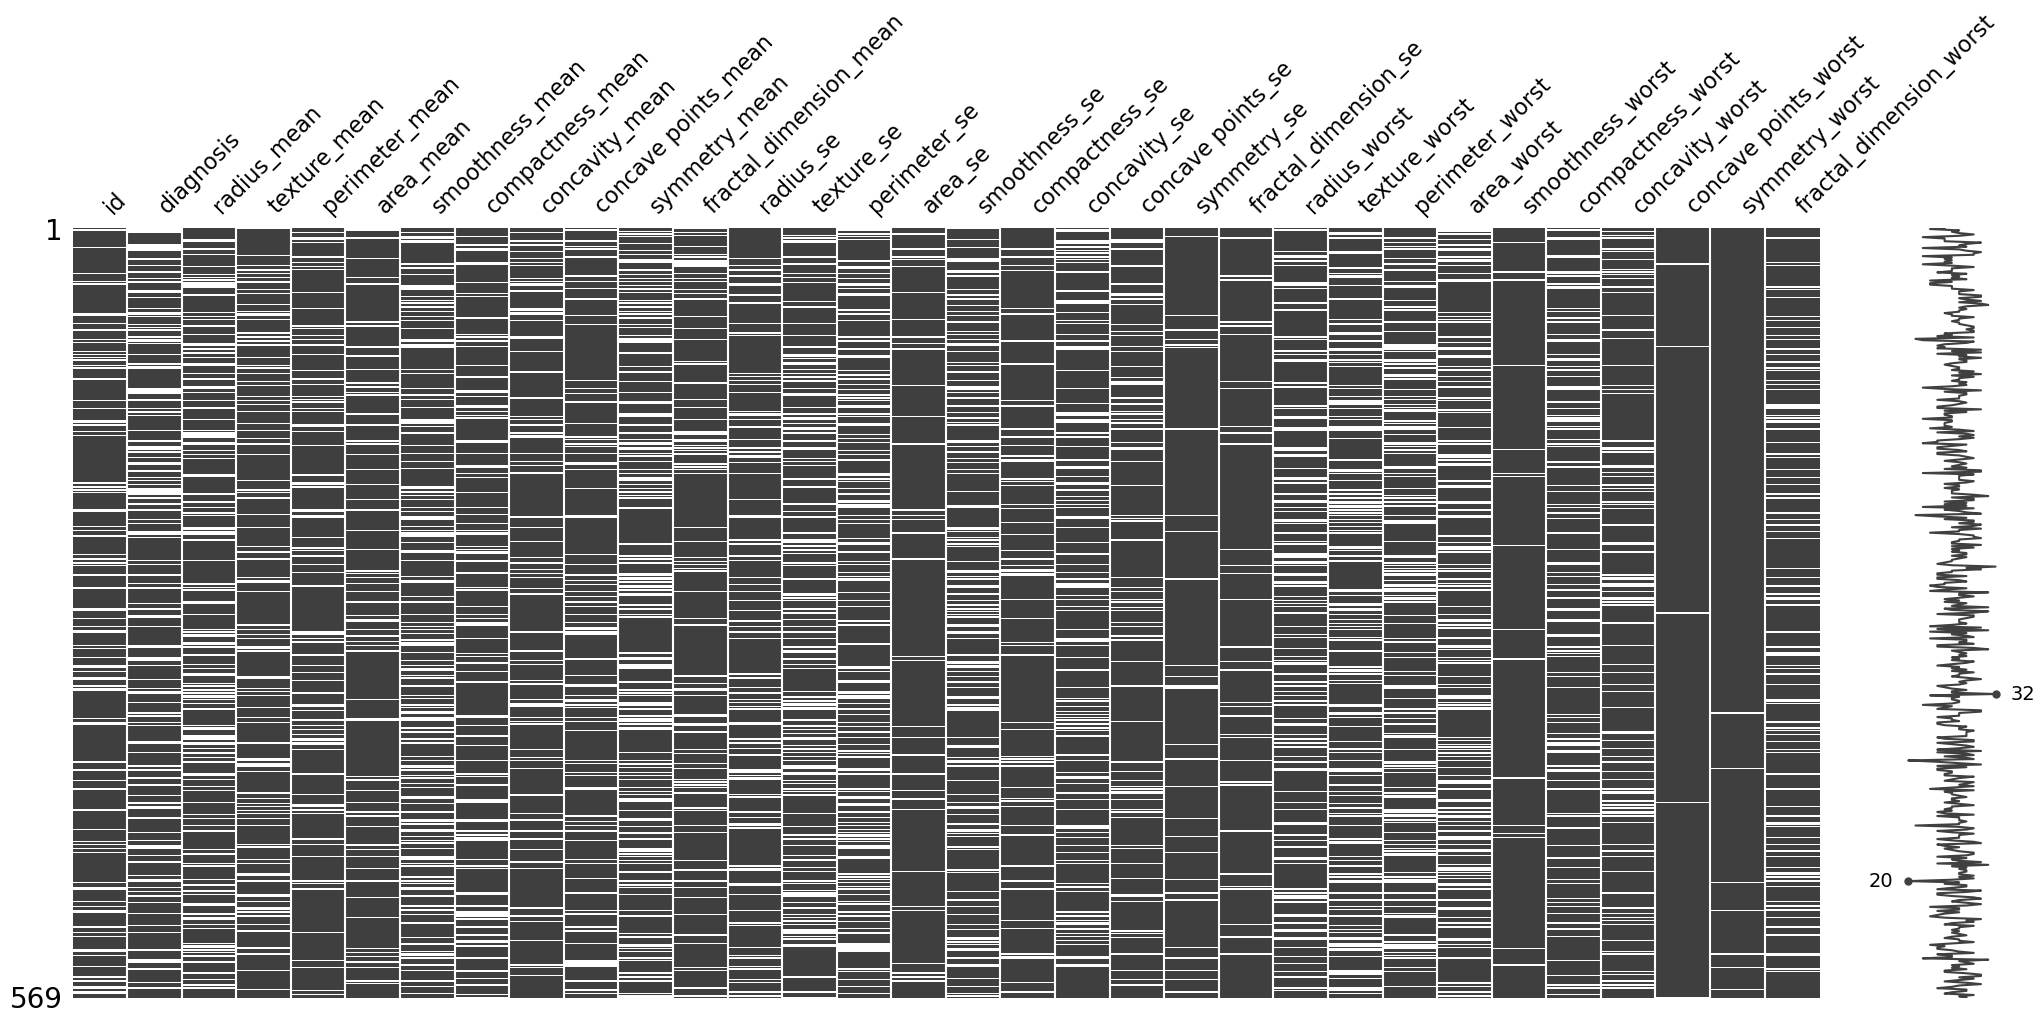

In [23]:
msno.matrix(data_nans)

# Imputación de la media (mantener la media de la variable)

Sustituir el valor que falta por la media de la variable en la que se produce.

Ventaja: La técnica preserva la media y el tamaño de la muestra.

Desventajas: subestima el error estándar y no preserva la correlación entre variables. La relación entre variables es un aspecto esencial del análisis, ya que el objetivo general del estudio es comprenderla mejor.

La imputación de medias no es una solución adecuada para los datos que faltan, a menos que los datos falten de forma completamente aleatoria (los datos que faltan no guardan relación alguna tanto con los datos que faltan como con los valores observados en el conjunto de datos).

In [24]:
data_imput = data_nans.copy()
del data_imput["diagnosis"]
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')

miss_mean_imputer = imputer.fit(data_imput)

imputed_df = miss_mean_imputer.transform(data_imput.values)

In [25]:
data_imput

,id,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302.0,17.99,NaN,122.80,NaN,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,NaN,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,NaN,20.57,17.77,132.90,NaN,0.08474,0.07864,0.08690,NaN,0.1812,...,NaN,23.41,158.80,NaN,0.12380,NaN,0.2416,0.1860,0.2750,0.08902
2,84300903.0,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,NaN,...,23.570,25.53,152.50,NaN,0.14440,0.42450,NaN,0.2430,0.3613,0.08758
3,84348301.0,11.42,20.38,NaN,386.1,NaN,0.28390,NaN,0.10520,0.2597,...,14.910,NaN,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402.0,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,NaN,...,22.540,NaN,152.20,NaN,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,NaN,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,NaN,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,NaN,20.13,28.25,131.20,1261.0,NaN,0.10340,0.14400,NaN,NaN,...,23.690,NaN,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954.0,16.60,28.08,NaN,858.1,0.08455,NaN,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,NaN,0.3403,0.1418,0.2218,0.07820
567,927241.0,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,NaN,...,25.740,39.42,184.60,NaN,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [26]:
imputed_df.shape #Array de numpy

(569, 31)

<Axes: >

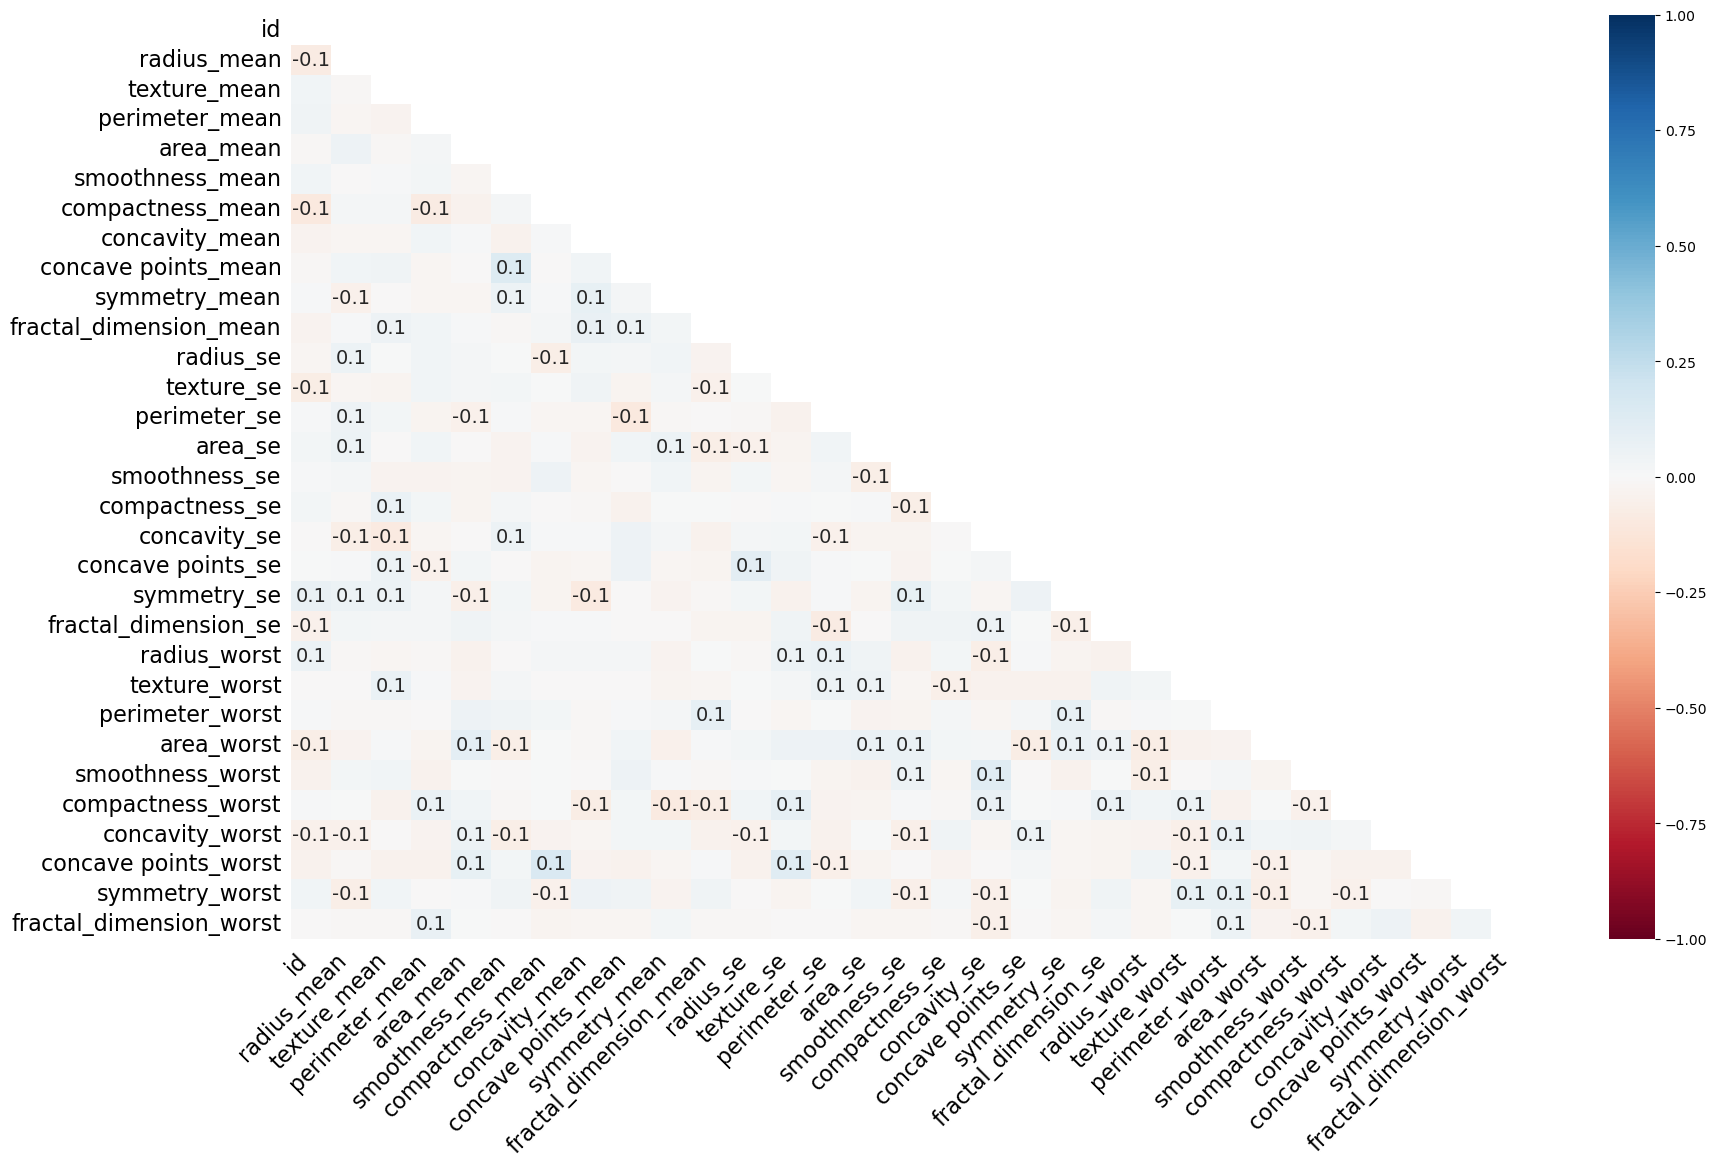

In [27]:
msno.heatmap(data_imput)

In [28]:
#no aparece nada porque no tenemos NaN
for i in range(0,569):
    for j in range(0,31):
        if imputed_df[i][j]==np.nan:
            print("there are nans")

## Relleno aleatorio | Hot Deck Imputation

Sustituya el valor que falta de la observación por un valor seleccionado aleatoriamente de entre todas las observaciones de la muestra que tengan valores similares en otras variables.

Esta técnica garantiza que el valor de imputación sólo se selecciona del intervalo posible en el que probablemente podría caer el valor real, y se selecciona aleatoriamente en lugar de estar determinado, lo cual es un aspecto esencial para un error típico correcto.

A continuación vamos a rellenar los datos faltantes con otra observación aleatoria dentro de la columna

In [30]:
# ffill utiliza la última observación arrastrada
data_hd = data_nans.copy()
data_hd.fillna(method='ffill', inplace=True)

In [31]:
data_hd

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302.0,NaN,17.99,NaN,122.80,NaN,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,NaN,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842302.0,NaN,20.57,17.77,132.90,NaN,0.08474,0.07864,0.08690,0.14710,...,25.380,23.41,158.80,NaN,0.12380,0.66560,0.2416,0.1860,0.2750,0.08902
2,84300903.0,NaN,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,NaN,0.14440,0.42450,0.2416,0.2430,0.3613,0.08758
3,84348301.0,NaN,11.42,20.38,130.00,386.1,0.10960,0.28390,0.19740,0.10520,...,14.910,25.53,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402.0,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,25.53,152.20,567.7,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926125.0,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,1819.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926125.0,M,20.13,28.25,131.20,1261.0,0.11100,0.10340,0.14400,0.13890,...,23.690,26.40,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954.0,M,16.60,28.08,131.20,858.1,0.08455,0.10340,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.19220,0.3403,0.1418,0.2218,0.07820
567,927241.0,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1124.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [32]:
for i, column in enumerate(data_hd.columns):
    nan_count = data_hd[column].isna().sum()
    if nan_count > 0:
        print(i, column, nan_count)

1 diagnosis 4
3 texture_mean 1
5 area_mean 2
11 fractal_dimension_mean 1
14 perimeter_se 2
16 smoothness_se 1
25 area_worst 3


## Cold Deck Imputation | Sustitución de valor nulo por uno similar.

Sustituir los datos que faltan utilizando un valor elegido entre otras variables con valores de observación similares.

La diferencia entre esta técnica y la imputación Hot Deck es que el proceso de selección del valor de imputación no es aleatorio.

In [33]:
from sklearn.impute import KNNImputer

data_hd = data_nans.copy()
imputer = KNNImputer(n_neighbors=2, weights="uniform") #aquí le ponemos el número de vecinos más cercanos.

data_hd['radius_mean'] = imputer.fit_transform(data_nans[['radius_mean']])

In [34]:
all_errors = [abs(data_hd['radius_mean'][i]-data['radius_mean'][i]) for i in range(len(data))]
print(np.mean(all_errors))
print(np.std(all_errors))
print(np.std(data['radius_mean']))

0.665351889381379
1.594055920699513
3.5209507607110626


## Regression | Regresión

Ajustar un modelo de regresión a una característica con datos ausentes y, a continuación, utilizar las predicciones de este modelo de regresión para sustituir los valores ausentes en esta característica.

Esta técnica preserva las relaciones entre las características --> es una ventaja significativa sobre las técnicas de imputación simples, como la imputación de la media y la moda.

Cuando sepamos que nuestras variables se correlacionan con otras variales, entonces quitamos valores nulo.

In [35]:
missing_columns = ["radius_mean", "texture_mean", "perimeter_mean"]
deter_data = pd.DataFrame(columns = ["Det" + name for name in missing_columns])
data_nans_imp = data.copy()
del data_nans_imp["diagnosis"]
del data_nans_imp["Unnamed: 32"]
for col in missing_columns:
    data_nans_imp[col + '_imp'] = data_nans_imp[col]

In [36]:
### Deterministic regression
for feature in missing_columns:
    deter_data["Det" + feature] = data_nans_imp[feature + "_imp"]
    parameters = list(set(data_nans_imp.columns) - set(missing_columns) - {feature + '_imp'})
    
    #Create a Linear Regression model to estimate the missing data
    model = linear_model.LinearRegression()
    model.fit(X = data_nans_imp[parameters], y = data_nans_imp[feature + '_imp'])
    
    #observe that I preserve the index of the missing data from the original dataframe
    deter_data.loc[data_nans_imp[feature].isnull(), "Det" + feature] = model.predict(data_nans_imp[parameters])[data_nans_imp[feature].isnull()]

In [37]:
deter_data

,Detradius_mean,Dettexture_mean,Detperimeter_mean
0,17.99,10.38,122.80
1,20.57,17.77,132.90
2,19.69,21.25,130.00
3,11.42,20.38,77.58
4,20.29,14.34,135.10
...,...,...,...
564,21.56,22.39,142.00
565,20.13,28.25,131.20
566,16.60,28.08,108.30
567,20.60,29.33,140.10


## Stochastic regression imputation | Imputación por regresión estocástica

Añadir una variación aleatoria (término de error) al valor predicho, reproduciendo así más adecuadamente la correlación de X e Y.

Le añadimos algún error para añadir diversidad.

In [39]:
missing_columns = ["radius_mean", "texture_mean", "perimeter_mean"]
deter_data = pd.DataFrame(columns = ["Det" + name for name in missing_columns])
data_nans_imp = data.copy()
del data_nans_imp["diagnosis"]
del data_nans_imp["Unnamed: 32"]
for col in missing_columns:
    data_nans_imp[col + '_imp'] = data_nans_imp[col]

In [40]:
random_data = pd.DataFrame(columns = ["Ran" + name for name in missing_columns])
for feature in missing_columns:
        
    random_data["Ran" + feature] = data_nans_imp[feature + '_imp']
    parameters = list(set(data_nans_imp.columns) - set(missing_columns) - {feature + '_imp'})
    
    model = linear_model.LinearRegression()
    model.fit(X = data_nans_imp[parameters], y = data_nans_imp[feature + '_imp'])
    
    #Standard Error of the regression estimates is equal to std() of the errors of each estimates
    predict = model.predict(data_nans_imp[parameters])
    std_error = (predict[data_nans_imp[feature].notnull()] - data_nans_imp.loc[data_nans_imp[feature].notnull(), feature + '_imp']).std()
    
    #observe that I preserve the index of the missing data from the original dataframe
    random_predict = np.random.normal(size = data_nans_imp[feature].shape[0], 
                                      loc = predict, 
                                      scale = std_error)
    random_data.loc[(data_nans_imp[feature].isnull()) & (random_predict > 0), "Ran" + feature] = random_predict[(data_nans_imp[feature].isnull()) & 
                                                                            (random_predict > 0)]

## 2. Encodign categorical data | Codificar datos categóricos

La codificación de datos categóricos consiste en cambiar los datos que pertenecen a categorías por datos numéricos.

In [42]:
y = pd.get_dummies(data.diagnosis, prefix='diagnosis')

In [43]:
y.head()

,diagnosis_B,diagnosis_M
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [44]:
# Otras técnicas:

from sklearn.preprocessing import OneHotEncoder

x = [[11, "Spain"], [22, "France"], [33, "Spain"], [44, "Germany"], [55, "France"]]
y = OneHotEncoder().fit_transform(x).toarray()
print(y)

[[1. 0. 0. 0. 0. 0. 0. 1.]
 [0. 1. 0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 1. 0.]
 [0. 0. 0. 0. 1. 1. 0. 0.]]


# 3. Scaling the data | Escalar los datos

Para trabajar con conjuntos de datos cuyas características no están en la misma escala.

Para conjuntos de datos en los que algunas características tienen valores enormes y otras valores pequeños.

Para evitar que las características con valores tremendos dominen a las que tienen valores pequeños, y el modelo de aprendizaje automático trate a las que tienen valores pequeños como si no existieran (no se tiene en cuenta su influencia en los datos).

Para evitar esto se utiliza el escalado de características en el mismo rango, es decir, dentro del intervalo de -3 y 3.

In [45]:
col_sacale = ["area_mean", "radius_mean", "texture_mean", "concavity_mean", "area_worst"]
for feature in col_sacale:
    print(feature, min(data[feature]), max(data[feature]))

area_mean 143.5 2501.0
radius_mean 6.981 28.11
texture_mean 9.71 39.28
concavity_mean 0.0 0.4268
area_worst 185.2 4254.0


In [49]:
# Técnica de la libreria sklearn.preprocessing que hace la normalización MinMaxScaler
sc = MinMaxScaler()
from sklearn.preprocessing import MinMaxScaler 
data_scaled = sc.fit_transform(data[col_sacale])

In [47]:
for i in range(len(col_sacale)):
    print(min(data_scaled[:,i]), max(data_scaled[:,i]))

0.0 0.9999999999999999
0.0 1.0
0.0 1.0
0.0 0.9999999999999999
0.0 1.0


In [50]:
# técnica de la libreria sklearn.preprocessing para hacer una estandarización StandardScaler
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
data_scaled = sc.fit_transform(data[col_sacale])
for i in range(len(col_sacale)):
    print(min(data_scaled[:,i]), max(data_scaled[:,i]))

-1.454443086394449 5.250528825265325
-2.0296483039857525 3.9712876465451097
-2.2292485121703924 4.651888980771197
-1.1148728439607505 4.243588822363918
-1.2224228403327004 5.93017239869624
